# Correction of practice 6

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
headers = {'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:106.0) Gecko/20100101 Firefox/106.0'}
resp = requests.get('https://news.google.com/search?q=apple', headers = headers)
print(resp.content)

In [ ]:
soup = BeautifulSoup(resp.content)

In [ ]:
print(soup.prettify())

In [ ]:
for i in soup.find_all('a', class_ = "DY5T1d RZIKme"):
    print(i.text)

In [ ]:
links = []
for i in soup.find_all('a', class_ = "DY5T1d RZIKme"):
    links.append("https://news.google.com" + i['href'][1:])

In [ ]:
import datetime
for i in soup.find_all('time', class_ = "WW6dff uQIVzc Sksgp slhocf"):
    t = i['datetime']
    t = datetime.datetime.strptime(t, "%Y-%m-%dT%H:%M:%SZ")
    print(t)

In [ ]:
print(links[0])
r = requests.get(links[0], headers =headers)
s = BeautifulSoup(r.content)
print(s.prettify())

In [ ]:
print(s.find('a', jsname = "tljFtd").text)

# Lecture 7 : Data cleaning

In [ ]:
#import
import pandas as pd
import numpy

In [ ]:
# Read csv file into a pandas dataframe
df = pd.read_csv(r"D:\KBTU\2022-2023\Python Course\Course\Lecture\Lecture_7\csv_to_clean.csv")
print(df)

## Finding missing values

In [ ]:
#Find the standard missing values isnull function
print(df.isnull().sum().sum())

In [ ]:
#Non standard missing values : na_values in the read_csv function
#use of unique function to identify them
missing_values= ['na', '--']
df = pd.read_csv(r"D:\KBTU\2022-2023\Python Course\Course\Lecture\Lecture_7\csv_to_clean.csv",
                na_values = missing_values)
print(df)
print(df.isnull().sum().sum())

In [ ]:
#Unexpected format missing values : check if value can be int for example
for index, lines in df.iterrows():
    try:
        a = int(lines['OWN_OCCUPIED'])
        print(a)
        df.iloc[3, 3] = np.nan
    except:
        pass


In [ ]:
# a bit about try/except

try:
    while True:
        continue
except:
    print('error')
print('my code continue')

In [ ]:
#Check the sum of missing values
print(df.isnull().sum())

In [ ]:
#YOUR TURN (15 minutes) => Then break
#Find all missing values in the provided dataframe
#Check all the null
#Find the other types of missing values
#There are '-', 'ERROR', wrong date, 'NaN', no data
import pandas as pd
import numpy as np
missing_values= ['-', 'ERROR']
df = pd.read_csv(r"D:\KBTU\2022-2023\Python Course\Course\Lecture\Lecture_7\Apple_price_to_clean.csv",
                na_values = missing_values)
print(df.isnull().sum())

for index, lines in df.iterrows():
    try:
        a = int(lines['Date'])
        print(a)
        df.loc[index, 'Date'] = np.nan
    except:
        pass
print(df.head(20))

## Replacing missing values

In [ ]:
#reload df
missing_values= ['na', '--']
df = pd.read_csv(r"D:\KBTU\2022-2023\Python Course\Course\Lecture\Lecture_7\csv_to_clean.csv",
                na_values = missing_values)
# print(df)

In [ ]:
#delete lines with dropna with subset and inplace aeguments
# df = df.dropna()
# print(df)
df.dropna(inplace = True, subset = 'ST_NUM')
print(df)

In [ ]:
# Location based replacement with the loc function
df.loc[3, 'NUM_BATH'] = 1
print(df)

In [ ]:
# Replace missing values with a number (fillna() function with inplace arg)
df.fillna(0, inplace = True)
print(df)

In [ ]:
#Replacing the missing values with a median 
#(calculate median and then use the replace with a number)
# print(df)
print(df['NUM_BEDROOMS'].mean())
df['NUM_BEDROOMS'].fillna(df['NUM_BEDROOMS'].mean(), inplace = True)
print(df)

In [ ]:
#Replacing the values by the one before or after : df.fillna(method='bfill')
df['NUM_BEDROOMS'].fillna(method = 'bfill', inplace = True)
print(df)

In [ ]:
#YOUR TURN 5 minutes => 12:27
#replace all the missing values in the previous dataframe with the frontfilling (ffill) method 
#put 0 for the first ones
df.fillna(method = 'ffill', inplace = True)
df.fillna(0, inplace = True)

## Removing useless data

In [ ]:
#reload df
import pandas as pd
missing_values= ['na', '--']
df = pd.read_csv(r"D:\KBTU\2022-2023\Python Course\Course\Lecture\Lecture_7\csv_to_clean.csv",
                na_values = missing_values)
print(df)

In [ ]:
#Use the drop() function with inplace and axis arg
df.drop(['PID'], axis = 1, inplace = True)
print(df)

In [ ]:
#Use the drop duplicates to remove useless lines
df.drop_duplicates(inplace = True)
print(df)

In [ ]:
#YOUR TURN 5 minutes
#Drop all duplicates in your df
#get number of rows
#drop duplicates
#get number of row again
missing_values= ['-', 'ERROR']
df = pd.read_csv(r"D:\KBTU\2022-2023\Python Course\Course\Lecture\Lecture_7\Apple_price_to_clean.csv",
                na_values = missing_values)
print(df)
df.drop_duplicates(inplace=True)
print(df)

## Outliers

In [ ]:
#reload df
import pandas as pd
missing_values= ['na', '--']
df = pd.read_csv(r"D:\KBTU\2022-2023\Python Course\Course\Lecture\Lecture_7\csv_to_clean.csv",
                na_values = missing_values)
print(df)

In [ ]:
#With the describe method
print(df.describe())

In [ ]:
# With the plot method
df.plot(y = 'SQ_M')

In [ ]:
#select the df in the range
df = df[df['SQ_M'] < 10000]
df.plot(y = 'SQ_M')

In [9]:
#YOUR TURN 10 minutes
#Find the outliers in your dataset and remove them
import pandas as pd
missing_values= ['-', 'ERROR']
df = pd.read_csv(r"D:\KBTU\2022-2023\Python Course\Course\Lecture\Lecture_7\Apple_price_to_clean.csv",
                na_values = missing_values)
df.drop_duplicates(inplace=True)
df = df[df['High'] > 0]
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  1759.000000  1760.000000  1759.000000  1757.000000  1760.000000   
mean     73.558437    74.054901    73.226885    72.948631    71.805287   
std      48.999702    48.561544    58.140202    49.780753    48.451877   
min      22.500000    22.917500    22.367500  -470.599998    20.949606   
25%      36.455000    36.788751    36.237501    36.570000    34.484875   
50%      50.072498    50.385001    49.610001    50.119999    48.677069   
75%     120.955002   122.625002   119.205002   120.959999   119.565588   
max     500.099998   182.940002  1490.339996   182.009995   181.259918   

             Volume  
count  1.758000e+03  
mean   1.325885e+08  
std    2.770364e+08  
min    4.100000e+07  
25%    8.567892e+07  
50%    1.093036e+08  
75%    1.477417e+08  
max    1.146192e+10  


<AxesSubplot:xlabel='Date'>

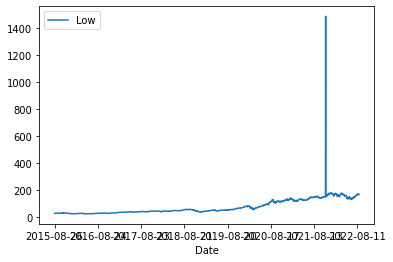

In [10]:
df.plot(x = 'Date', y = 'Low')

<AxesSubplot:xlabel='Date'>

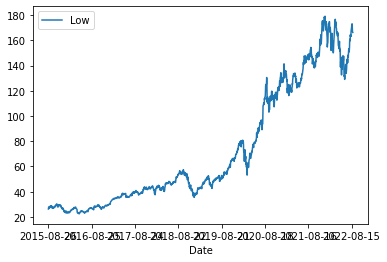

In [11]:
df = df[df['Low'] < 200]
df.plot(x = 'Date', y = 'Low')

<AxesSubplot:xlabel='Date'>

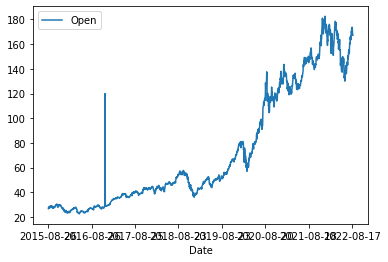

In [13]:
df = df[df['Open'] < 200]
df.plot(x = 'Date', y = 'Open')